In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, cv, Pool

In [2]:
data_input=pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/mmc3.csv", sep=',')
labels=data_input['Overpotential']
features=data_input.drop('Overpotential', axis=1).drop('DOI', axis=1)

X_train,X_test,y_train,y_test=train_test_split(features, labels, test_size=0.001, random_state=42) #42
scaler = MinMaxScaler(feature_range=(-1, 1))
train_set_scaled = scaler.fit_transform(X_train)
X_train

,Pt_wt,Pt_size,Surface_area,N_doped,pH,Current_Density
283,0.50,0.35,282.00,12.08,0.3,40
327,0.35,1.00,92.85,0.00,0.5,100
145,5.80,4.30,27.20,0.00,0.3,40
55,11.24,10.00,96.50,3.40,14.0,40
93,9.50,5.00,109.75,4.50,7.4,10
...,...,...,...,...,...,...
71,10.00,3.50,254.00,0.00,0.3,20
106,7.49,5.00,128.40,3.50,14.0,40
270,1.00,0.54,282.00,12.08,0.3,10
348,0.25,0.35,282.00,12.08,0.3,20


In [3]:
base_xgb_reg = XGBRegressor(
    n_estimators=1500,         
    learning_rate=0.05,       
    max_depth=7,              
    subsample=0.5,             
    colsample_bytree=1.0,      
    reg_lambda=1,             
    reg_alpha=1,               
    objective='reg:squarederror', 
    random_state=0,        )    

# Fit the model
base_xgb_reg.fit(train_set_scaled, y_train, eval_metric='rmse', verbose=True, eval_set=[(train_set_scaled, y_train)], early_stopping_rounds=100)

[0]	validation_0-rmse:156.12381
[1]	validation_0-rmse:150.44918
[2]	validation_0-rmse:144.20140
[3]	validation_0-rmse:138.37302
[4]	validation_0-rmse:132.89944
[5]	validation_0-rmse:128.11487
[6]	validation_0-rmse:123.10011
[7]	validation_0-rmse:118.24507
[8]	validation_0-rmse:113.45169
[9]	validation_0-rmse:108.99821
[10]	validation_0-rmse:105.00500
[11]	validation_0-rmse:100.88747
[12]	validation_0-rmse:96.96051
[13]	validation_0-rmse:93.32939
[14]	validation_0-rmse:89.76602
[15]	validation_0-rmse:86.90461
[16]	validation_0-rmse:83.73674
[17]	validation_0-rmse:80.65780
[18]	validation_0-rmse:77.90340
[19]	validation_0-rmse:75.36533
[20]	validation_0-rmse:72.87763
[21]	validation_0-rmse:70.51649
[22]	validation_0-rmse:67.98756
[23]	validation_0-rmse:65.61251
[24]	validation_0-rmse:63.43587


/home/kumail/anaconda3/envs/rapids-23.04/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/kumail/anaconda3/envs/rapids-23.04/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:61.27396
[26]	validation_0-rmse:59.26394
[27]	validation_0-rmse:57.39733
[28]	validation_0-rmse:55.30261
[29]	validation_0-rmse:53.76085
[30]	validation_0-rmse:51.96757
[31]	validation_0-rmse:50.19879
[32]	validation_0-rmse:48.78272
[33]	validation_0-rmse:47.25889
[34]	validation_0-rmse:45.72677
[35]	validation_0-rmse:44.32838
[36]	validation_0-rmse:43.35863
[37]	validation_0-rmse:42.19902
[38]	validation_0-rmse:40.97569
[39]	validation_0-rmse:40.05514
[40]	validation_0-rmse:38.84436
[41]	validation_0-rmse:37.74276
[42]	validation_0-rmse:36.98681
[43]	validation_0-rmse:35.91734
[44]	validation_0-rmse:35.15842
[45]	validation_0-rmse:34.12954
[46]	validation_0-rmse:33.30888
[47]	validation_0-rmse:32.28714
[48]	validation_0-rmse:31.47746
[49]	validation_0-rmse:30.62037
[50]	validation_0-rmse:29.79941
[51]	validation_0-rmse:29.21155
[52]	validation_0-rmse:28.68467
[53]	validation_0-rmse:28.06366
[54]	validation_0-rmse:27.46468
[55]	validation_0-rmse:26.90012
[56]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [ ]:
base_xgb_reg = XGBRegressor(
    n_estimators=1500,         
    learning_rate=0.05,       
    max_depth=7,              
    subsample=0.5,             
    colsample_bytree=1.0,      
    reg_lambda=1,             
    reg_alpha=1,               
    objective='reg:squarederror', 
    random_state=0,        )    

# Fit the model
base_xgb_reg.fit(train_set_scaled, y_train, eval_metric='rmse', verbose=True, eval_set=[(train_set_scaled, y_train)], early_stopping_rounds=100)

In [2]:
SnPtCo_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/SnPtCo.csv", sep=',')
PtSr_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtSr.csv", sep=',')
PtRu_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtRu.csv", sep=',')
PtPd_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtPd.csv", sep=',')
PtNiTb_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtNiTb.csv", sep=',')
PtNiMn_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtNiMn.csv", sep=',')
PtNiFe_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtNiFe.csv", sep=',')
PtNiCuTb_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtNiCuTb.csv", sep=',')
PtNiCuFe_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtNiCuFe.csv", sep=',')
PtNiCu_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtNiCu.csv", sep=',')
PtNiCo_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtNiCo.csv", sep=',')
PtNi_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtNi.csv", sep=',')
PtEr_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtEr.csv", sep=',')
PtCo_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/PtCo.csv", sep=',')
Pt_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/Pt.csv", sep=',')
NiPt_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/NiPt.csv", sep=',')
CuPt_Test_Data =pd.read_csv("/home/kumail/Energy_AI/ML-Metal-HER-Catalyst/Proposed Model/Dataset2/Generability_Experimential/CuPt.csv", sep=',')

def split_dataframe(df):
    df = df.drop(columns=['DOI'])
    X = df[['Pt_wt', 'Pt_size', 'Surface_area', 'N_doped', 'pH', 'Current_Density']]
    Y = df['Overpotential']
    return X, Y

X_SnPtCo_Test_Data, Y_SnPtCo_Test_Data = split_dataframe(SnPtCo_Test_Data)
X_PtSr_Test_Data, Y_PtSr_Test_Data = split_dataframe(PtSr_Test_Data)
X_PtRu_Test_Data, Y_PtRu_Test_Data = split_dataframe(PtRu_Test_Data)
X_PtPd_Test_Data, Y_PtPd_Test_Data = split_dataframe(PtPd_Test_Data)
X_PtNiTb_Test_Data, Y_PtNiTb_Test_Data = split_dataframe(PtNiTb_Test_Data)
X_PtNiMn_Test_Data, Y_PtNiMn_Test_Data = split_dataframe(PtNiMn_Test_Data)
X_PtNiFe_Test_Data, Y_PtNiFe_Test_Data = split_dataframe(PtNiFe_Test_Data)
X_PtNiCuTb_Test_Data, Y_PtNiCuTb_Test_Data = split_dataframe(PtNiCuTb_Test_Data)
X_PtNiCuFe_Test_Data, Y_PtNiCuFe_Test_Data = split_dataframe(PtNiCuFe_Test_Data)
X_PtNiCu_Test_Data, Y_PtNiCu_Test_Data = split_dataframe(PtNiCu_Test_Data)
X_PtNiCo_Test_Data, Y_PtNiCo_Test_Data = split_dataframe(PtNiCo_Test_Data)
X_PtNi_Test_Data, Y_PtNi_Test_Data = split_dataframe(PtNi_Test_Data)
X_PtEr_Test_Data, Y_PtEr_Test_Data = split_dataframe(PtEr_Test_Data)
X_PtCo_Test_Data, Y_PtCo_Test_Data = split_dataframe(PtCo_Test_Data)
X_Pt_Test_Data, Y_Pt_Test_Data = split_dataframe(Pt_Test_Data)
X_NiPt_Test_Data, Y_NiPt_Test_Data = split_dataframe(NiPt_Test_Data)
X_CuPt_Test_Data, Y_CuPt_Test_Data = split_dataframe(CuPt_Test_Data)

In [25]:
CuPt_Test_Data 

,DOI,Composition,Pt_wt,Pt_size,Surface_area,N_doped,pH,Current_Density,Overpotential
0,10.1016/j.cej.2021.130749,CuPt,4.42,5,1715,2.90,13,10,46
1,10.1016/j.cej.2021.130749,CuPt,3.50,5,1715,2.08,13,10,224


In [5]:
PtNiMn_Test_Data

,DOI,Composition,Pt_wt,Pt_size,Surface_area,N_doped,pH,Current_Density,Overpotential
0,10.1021/acsnano.8b01022,PtNiMn,9.87,7.2,730,1.96,14,60,397
1,10.1021/acsnano.8b01022,PtNiMn,9.87,7.2,730,1.96,14,50,344
2,10.1021/acsnano.8b01022,PtNiMn,9.87,7.2,730,1.96,14,40,288
3,10.1021/acsnano.8b01022,PtNiMn,9.87,7.2,730,1.96,14,20,161
4,10.1021/acsnano.8b01022,PtNiMn,9.87,7.2,730,1.96,14,10,90


In [6]:
PtNiCuFe_Test_Data

,DOI,Composition,Pt_wt,Pt_size,Surface_area,N_doped,pH,Current_Density,Overpotential
0,10.1021/acsnano.8b01022,PtNiCuFe,6.16,7.2,680,1.82,14,150,386
1,10.1021/acsnano.8b01022,PtNiCuFe,6.16,7.2,680,1.82,14,100,280
2,10.1021/acsnano.8b01022,PtNiCuFe,6.16,7.2,680,1.82,14,80,232
3,10.1021/acsnano.8b01022,PtNiCuFe,6.16,7.2,680,1.82,14,60,182
4,10.1021/acsnano.8b01022,PtNiCuFe,6.16,7.2,680,1.82,14,50,157
5,10.1021/acsnano.8b01022,PtNiCuFe,6.16,7.2,680,1.82,14,40,131
6,10.1021/acsnano.8b01022,PtNiCuFe,6.16,7.2,680,1.82,14,20,73
7,10.1021/acsnano.8b01022,PtNiCuFe,6.16,7.2,680,1.82,14,10,40


In [7]:
PtNiCu_Test_Data

,DOI,Composition,Pt_wt,Pt_size,Surface_area,N_doped,pH,Current_Density,Overpotential
0,10.1021/acsnano.8b01022,PtNiCu,7.64,7.3,681,1.8,14,150,360
1,10.1021/acsnano.8b01022,PtNiCu,7.64,7.3,681,1.8,14,100,260
2,10.1021/acsnano.8b01022,PtNiCu,7.64,7.3,681,1.8,14,80,216
3,10.1021/acsnano.8b01022,PtNiCu,7.64,7.3,681,1.8,14,60,172
4,10.1021/acsnano.8b01022,PtNiCu,7.64,7.3,681,1.8,14,50,150
5,10.1021/acsnano.8b01022,PtNiCu,7.64,7.3,681,1.8,14,40,125
6,10.1021/acsnano.8b01022,PtNiCu,7.64,7.3,681,1.8,14,20,68
7,10.1021/acsnano.8b01022,PtNiCu,7.64,7.3,681,1.8,14,10,38


In [8]:
PtNiCo_Test_Data

,DOI,Composition,Pt_wt,Pt_size,Surface_area,N_doped,pH,Current_Density,Overpotential
0,10.1021/acsnano.8b01022,PtNiCo,10.74,7.2,717,1.9,14,100,367
1,10.1021/acsnano.8b01022,PtNiCo,10.74,7.2,717,1.9,14,80,306
2,10.1021/acsnano.8b01022,PtNiCo,10.74,7.2,717,1.9,14,60,246
3,10.1021/acsnano.8b01022,PtNiCo,10.74,7.2,717,1.9,14,50,215
4,10.1021/acsnano.8b01022,PtNiCo,10.74,7.2,717,1.9,14,40,184
5,10.1021/acsnano.8b01022,PtNiCo,10.74,7.2,717,1.9,14,20,112
6,10.1021/acsnano.8b01022,PtNiCo,10.74,7.2,717,1.9,14,10,69


In [9]:
Pt_Test_Data

,DOI,Composition,Pt_wt,Pt_size,Surface_area,N_doped,pH,Current_Density,Overpotential
0,10.1039/d0se01516d,Pt,1.40,0.36,586.90,12.10,0.3,100,89.10
1,10.1039/d0se01516d,Pt,1.40,0.36,586.90,12.10,0.3,10,18.10
2,10.1021/acsnano.8b01022,Pt,6.22,5.50,842.00,1.82,14.0,150,323.00
3,10.1021/acsnano.8b01022,Pt,6.22,5.50,842.00,1.82,14.0,100,235.00
4,10.1021/acsnano.8b01022,Pt,6.22,5.50,842.00,1.82,14.0,80,194.00
5,10.1021/acsnano.8b01022,Pt,6.22,5.50,842.00,1.82,14.0,60,155.00
6,10.1021/acsnano.8b01022,Pt,6.22,5.50,842.00,1.82,14.0,50,133.00
7,10.1021/acsnano.8b01022,Pt,6.22,5.50,842.00,1.82,14.0,40,111.00
8,10.1021/acsnano.8b01022,Pt,6.22,5.50,842.00,1.82,14.0,20,60.00
9,10.1021/acsnano.8b01022,Pt,6.22,5.50,842.00,1.82,14.0,10,30.00


In [165]:
PtRu_Test_Data

,DOI,Composition,Pt_wt,Pt_size,Surface_area,N_doped,pH,Current_Density,Overpotential
0,10.1039/c8ee00402a,PtRu,5.24,5.12,105.2,0.00,0.3,100,145.3
1,10.1039/c8ee00402a,PtRu,5.24,5.12,105.2,0.00,0.3,80,132.1
2,10.1039/c8ee00402a,PtRu,5.24,5.12,105.2,0.00,0.3,60,115.6
3,10.1039/c8ee00402a,PtRu,5.24,5.12,105.2,0.00,0.3,50,105.7
4,10.1039/c8ee00402a,PtRu,5.24,5.12,105.2,0.00,0.3,40,93.6
5,10.1039/c8ee00402a,PtRu,5.24,5.12,105.2,0.00,0.3,20,65.0
6,10.1039/c8ee00402a,PtRu,5.24,5.12,105.2,0.00,0.3,10,46.6
7,10.1039/c8ee00402a,PtRu,4.42,2.57,630.3,0.00,0.3,100,43.1
8,10.1039/c8ee00402a,PtRu,4.42,2.57,630.3,0.00,0.3,80,39.6
9,10.1039/c8ee00402a,PtRu,4.42,2.57,630.3,0.00,0.3,60,35.2


### SnPtCo

In [10]:
test_set_scaled = scaler.transform(X_SnPtCo_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_SnPtCo_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 231, ηProposedPred(mV): 155.18446350097656, Relative error(%): 32.8
ηExp(mV): 193, ηProposedPred(mV): 155.18446350097656, Relative error(%): 19.6
ηExp(mV): 150, ηProposedPred(mV): 134.6427459716797, Relative error(%): 10.2
ηExp(mV): 130, ηProposedPred(mV): 108.67093658447266, Relative error(%): 16.4
ηExp(mV): 108, ηProposedPred(mV): 101.05036163330078, Relative error(%): 6.4
ηExp(mV): 65, ηProposedPred(mV): 86.21192932128906, Relative error(%): 32.6
ηExp(mV): 39, ηProposedPred(mV): 56.08415603637695, Relative error(%): 43.8


### PtSr

In [11]:
test_set_scaled = scaler.transform(X_PtSr_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtSr_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 60.0, ηProposedPred(mV): 143.54742431640625, Relative error(%): 139.2
ηExp(mV): 52.0, ηProposedPred(mV): 132.97491455078125, Relative error(%): 155.7
ηExp(mV): 48.0, ηProposedPred(mV): 129.74179077148438, Relative error(%): 170.3
ηExp(mV): 45.0, ηProposedPred(mV): 121.70855712890625, Relative error(%): 170.5
ηExp(mV): 35.5, ηProposedPred(mV): 109.32633209228516, Relative error(%): 208.0
ηExp(mV): 27.0, ηProposedPred(mV): 79.09895324707031, Relative error(%): 193.0


### PtRu

In [12]:
test_set_scaled = scaler.transform(X_PtRu_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtRu_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 145.3, ηProposedPred(mV): 90.69754028320312, Relative error(%): 37.6
ηExp(mV): 132.1, ηProposedPred(mV): 90.85789489746094, Relative error(%): 31.2
ηExp(mV): 115.6, ηProposedPred(mV): 66.57318878173828, Relative error(%): 42.4
ηExp(mV): 105.7, ηProposedPred(mV): 64.72097778320312, Relative error(%): 38.8
ηExp(mV): 93.6, ηProposedPred(mV): 56.7495002746582, Relative error(%): 39.4
ηExp(mV): 65.0, ηProposedPred(mV): 38.731204986572266, Relative error(%): 40.4
ηExp(mV): 46.6, ηProposedPred(mV): 31.12580680847168, Relative error(%): 33.2
ηExp(mV): 43.1, ηProposedPred(mV): 110.44649505615234, Relative error(%): 156.3
ηExp(mV): 39.6, ηProposedPred(mV): 110.44649505615234, Relative error(%): 178.9
ηExp(mV): 35.2, ηProposedPred(mV): 96.35706329345703, Relative error(%): 173.7
ηExp(mV): 31.9, ηProposedPred(mV): 90.09153747558594, Relative error(%): 182.4
ηExp(mV): 29.7, ηProposedPred(mV): 75.43706512451172, Relative error(%): 154.0
ηExp(mV): 24.2, 

### PtPd

In [13]:
test_set_scaled = scaler.transform(X_PtPd_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtPd_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 167, ηProposedPred(mV): 64.43998718261719, Relative error(%): 61.4
ηExp(mV): 75, ηProposedPred(mV): 72.1355972290039, Relative error(%): 3.8
ηExp(mV): 58, ηProposedPred(mV): 49.377906799316406, Relative error(%): 14.9
ηExp(mV): 89, ηProposedPred(mV): 71.10075378417969, Relative error(%): 20.1
ηExp(mV): 74, ηProposedPred(mV): 49.44869613647461, Relative error(%): 33.2
ηExp(mV): 116, ηProposedPred(mV): 73.2084732055664, Relative error(%): 36.9
ηExp(mV): 85, ηProposedPred(mV): 50.954803466796875, Relative error(%): 40.1
ηExp(mV): 102, ηProposedPred(mV): 80.3608627319336, Relative error(%): 21.2
ηExp(mV): 67, ηProposedPred(mV): 33.082332611083984, Relative error(%): 50.6


### PtNiTb

In [18]:
test_set_scaled = scaler.transform(X_PtNiTb_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtNiTb_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 431, ηProposedPred(mV): 228.4222412109375, Relative error(%): 47.0
ηExp(mV): 367, ηProposedPred(mV): 202.94630432128906, Relative error(%): 44.7
ηExp(mV): 333, ηProposedPred(mV): 189.57244873046875, Relative error(%): 43.1
ηExp(mV): 293, ηProposedPred(mV): 173.80010986328125, Relative error(%): 40.7
ηExp(mV): 194, ηProposedPred(mV): 135.72789001464844, Relative error(%): 30.0
ηExp(mV): 126, ηProposedPred(mV): 75.25182342529297, Relative error(%): 40.3


### PtNiMn

In [19]:
test_set_scaled = scaler.transform(X_PtNiMn_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtNiMn_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 397, ηProposedPred(mV): 212.63897705078125, Relative error(%): 46.4
ηExp(mV): 344, ηProposedPred(mV): 210.5596160888672, Relative error(%): 38.8
ηExp(mV): 288, ηProposedPred(mV): 201.71820068359375, Relative error(%): 30.0
ηExp(mV): 161, ηProposedPred(mV): 154.84979248046875, Relative error(%): 3.8
ηExp(mV): 90, ηProposedPred(mV): 93.7107925415039, Relative error(%): 4.1


### PtNiFe

In [20]:
test_set_scaled = scaler.transform(X_PtNiFe_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtNiFe_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 391, ηProposedPred(mV): 199.94793701171875, Relative error(%): 48.9
ηExp(mV): 317, ηProposedPred(mV): 174.18228149414062, Relative error(%): 45.1
ηExp(mV): 276, ηProposedPred(mV): 162.16929626464844, Relative error(%): 41.2
ηExp(mV): 233, ηProposedPred(mV): 144.4728240966797, Relative error(%): 38.0
ηExp(mV): 136, ηProposedPred(mV): 100.5228271484375, Relative error(%): 26.1
ηExp(mV): 83, ηProposedPred(mV): 60.46533203125, Relative error(%): 27.2


### PtNiCuTb

In [22]:
test_set_scaled = scaler.transform(X_PtNiCuTb_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtNiCuTb_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 394, ηProposedPred(mV): 201.62115478515625, Relative error(%): 48.8
ηExp(mV): 346, ηProposedPred(mV): 201.62115478515625, Relative error(%): 41.7
ηExp(mV): 294, ηProposedPred(mV): 175.49136352539062, Relative error(%): 40.3
ηExp(mV): 264, ηProposedPred(mV): 163.2423858642578, Relative error(%): 38.2
ηExp(mV): 230, ηProposedPred(mV): 151.33157348632812, Relative error(%): 34.2
ηExp(mV): 146, ηProposedPred(mV): 107.65243530273438, Relative error(%): 26.3
ηExp(mV): 82, ηProposedPred(mV): 73.6994400024414, Relative error(%): 10.1


### PtNiCuFe

In [23]:
test_set_scaled = scaler.transform(X_PtNiCuFe_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtNiCuFe_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 386, ηProposedPred(mV): 162.7908172607422, Relative error(%): 57.8
ηExp(mV): 280, ηProposedPred(mV): 191.315185546875, Relative error(%): 31.7
ηExp(mV): 232, ηProposedPred(mV): 191.315185546875, Relative error(%): 17.5
ηExp(mV): 182, ηProposedPred(mV): 161.02850341796875, Relative error(%): 11.5
ηExp(mV): 157, ηProposedPred(mV): 146.22914123535156, Relative error(%): 6.9
ηExp(mV): 131, ηProposedPred(mV): 133.647705078125, Relative error(%): 2.0
ηExp(mV): 73, ηProposedPred(mV): 99.7646713256836, Relative error(%): 36.7
ηExp(mV): 40, ηProposedPred(mV): 67.3976058959961, Relative error(%): 68.5


### PtNiCu

In [24]:
test_set_scaled = scaler.transform(X_PtNiCu_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtNiCu_Test_Data
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 360, ηProposedPred(mV): 172.23941040039062, Relative error(%): 52.2
ηExp(mV): 260, ηProposedPred(mV): 200.78610229492188, Relative error(%): 22.8
ηExp(mV): 216, ηProposedPred(mV): 200.78610229492188, Relative error(%): 7.0
ηExp(mV): 172, ηProposedPred(mV): 175.02651977539062, Relative error(%): 1.8
ηExp(mV): 150, ηProposedPred(mV): 162.9632568359375, Relative error(%): 8.6
ηExp(mV): 125, ηProposedPred(mV): 145.00946044921875, Relative error(%): 16.0
ηExp(mV): 68, ηProposedPred(mV): 102.46399688720703, Relative error(%): 50.7
ηExp(mV): 38, ηProposedPred(mV): 65.91777038574219, Relative error(%): 73.5


### PtNiCo

In [25]:
test_set_scaled = scaler.transform(X_PtNiCo_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtNiCo_Test_Data
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 367, ηProposedPred(mV): 232.07923889160156, Relative error(%): 36.8
ηExp(mV): 306, ηProposedPred(mV): 232.07923889160156, Relative error(%): 24.2
ηExp(mV): 246, ηProposedPred(mV): 209.1675567626953, Relative error(%): 15.0
ηExp(mV): 215, ηProposedPred(mV): 206.2158203125, Relative error(%): 4.1
ηExp(mV): 184, ηProposedPred(mV): 194.74124145507812, Relative error(%): 5.8
ηExp(mV): 112, ηProposedPred(mV): 141.88572692871094, Relative error(%): 26.7
ηExp(mV): 69, ηProposedPred(mV): 91.484130859375, Relative error(%): 32.6


### PtNi

In [26]:
test_set_scaled = scaler.transform(X_PtNi_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtNi_Test_Data
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 391, ηProposedPred(mV): 196.83912658691406, Relative error(%): 49.7
ηExp(mV): 348, ηProposedPred(mV): 179.95358276367188, Relative error(%): 48.3
ηExp(mV): 304, ηProposedPred(mV): 164.20587158203125, Relative error(%): 46.0
ηExp(mV): 190, ηProposedPred(mV): 114.29954528808594, Relative error(%): 39.8
ηExp(mV): 118, ηProposedPred(mV): 62.268585205078125, Relative error(%): 47.2
ηExp(mV): 220, ηProposedPred(mV): 237.76547241210938, Relative error(%): 8.1
ηExp(mV): 202, ηProposedPred(mV): 237.76547241210938, Relative error(%): 17.7
ηExp(mV): 177, ηProposedPred(mV): 206.42359924316406, Relative error(%): 16.6
ηExp(mV): 159, ηProposedPred(mV): 186.72662353515625, Relative error(%): 17.4
ηExp(mV): 139, ηProposedPred(mV): 169.80906677246094, Relative error(%): 22.2
ηExp(mV): 79, ηProposedPred(mV): 134.2777862548828, Relative error(%): 70.0
ηExp(mV): 42, ηProposedPred(mV): 68.60940551757812, Relative error(%): 63.4


### PtEr

In [27]:
test_set_scaled = scaler.transform(X_PtEr_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtEr_Test_Data
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 92.7, ηProposedPred(mV): 197.53721618652344, Relative error(%): 113.1
ηExp(mV): 16.0, ηProposedPred(mV): 60.237674713134766, Relative error(%): 276.5
ηExp(mV): 50.0, ηProposedPred(mV): 218.0395965576172, Relative error(%): 336.1
ηExp(mV): 7.0, ηProposedPred(mV): 60.9146728515625, Relative error(%): 770.2


### PtCo

In [28]:
test_set_scaled = scaler.transform(X_PtCo_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_PtCo_Test_Data
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 370, ηProposedPred(mV): 47.46609115600586, Relative error(%): 87.2
ηExp(mV): 280, ηProposedPred(mV): 47.69741439819336, Relative error(%): 83.0


### Pt

In [29]:
test_set_scaled = scaler.transform(X_Pt_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_Pt_Test_Data 
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 89.1, ηProposedPred(mV): 77.2635269165039, Relative error(%): 13.3
ηExp(mV): 18.1, ηProposedPred(mV): 39.061824798583984, Relative error(%): 115.8
ηExp(mV): 323.0, ηProposedPred(mV): 177.9557647705078, Relative error(%): 44.9
ηExp(mV): 235.0, ηProposedPred(mV): 201.28533935546875, Relative error(%): 14.3
ηExp(mV): 194.0, ηProposedPred(mV): 201.28533935546875, Relative error(%): 3.8
ηExp(mV): 155.0, ηProposedPred(mV): 165.6761932373047, Relative error(%): 6.9
ηExp(mV): 133.0, ηProposedPred(mV): 157.63584899902344, Relative error(%): 18.5
ηExp(mV): 111.0, ηProposedPred(mV): 149.63412475585938, Relative error(%): 34.8
ηExp(mV): 60.0, ηProposedPred(mV): 123.93363189697266, Relative error(%): 106.6
ηExp(mV): 30.0, ηProposedPred(mV): 74.1681137084961, Relative error(%): 147.2
ηExp(mV): 470.0, ηProposedPred(mV): 34.76255798339844, Relative error(%): 92.6
ηExp(mV): 108.0, ηProposedPred(mV): 136.46881103515625, Relative error(%): 26.4
ηExp(mV): 90.

### NiPt

In [30]:
test_set_scaled = scaler.transform(X_NiPt_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_NiPt_Test_Data
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 513, ηProposedPred(mV): 114.50093078613281, Relative error(%): 77.7


### CuPt

In [31]:
test_set_scaled = scaler.transform(X_CuPt_Test_Data)
y_pred = base_xgb_reg.predict(test_set_scaled)
result1 = pd.DataFrame(columns=['y_test', 'y_pred'])
result1['y_test'] = Y_CuPt_Test_Data
result1['y_pred'] = y_pred

experimental_values = result1['y_test'].tolist()
proposed_predicted_values = result1['y_pred'].tolist() 

# Function to calculate relative error
def calculate_relative_error(exp, pred):
    return abs(pred - exp) / exp * 100

# Calculate relative errors for both models
proposed_relative_errors = [calculate_relative_error(exp, pred) for exp, pred in zip(experimental_values, proposed_predicted_values)]

print("\nProposed Model Relative Errors (%):")
for exp, pred, error in zip(experimental_values, proposed_predicted_values, proposed_relative_errors):
    print(f"ηExp(mV): {exp}, ηProposedPred(mV): {pred}, Relative error(%): {error:.1f}")


Proposed Model Relative Errors (%):
ηExp(mV): 46, ηProposedPred(mV): 47.31686019897461, Relative error(%): 2.9
ηExp(mV): 224, ηProposedPred(mV): 51.77644729614258, Relative error(%): 76.9


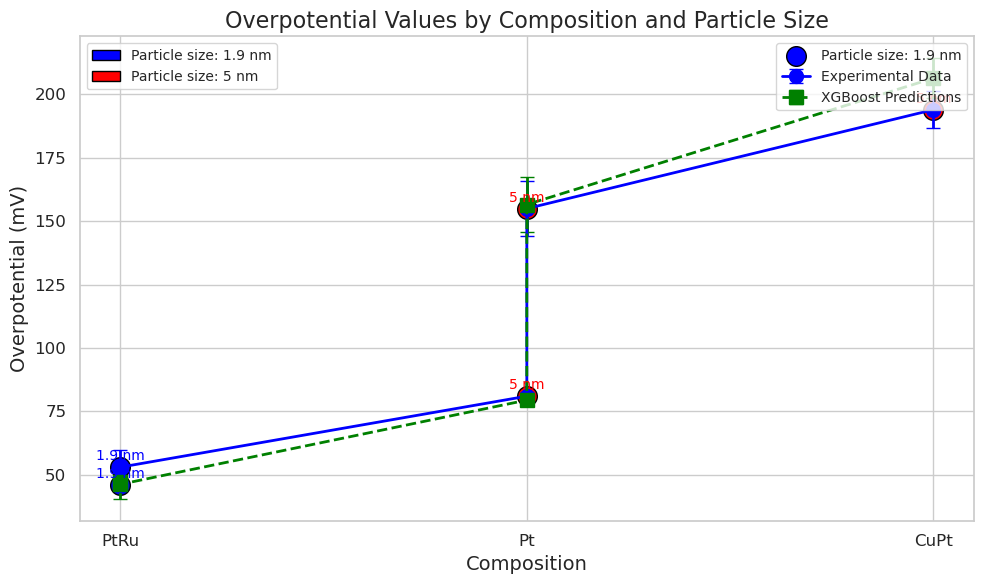

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch

# Data
composition = ['PtRu', 'PtRu', 'Pt', 'Pt', 'CuPt']
experimental_values = [46, 53, 81, 155, 194]
xgboost_values = [47.3, 46.24, 79.46, 156.6, 206.4]
relative_errors = [2.9, 12.7, 1.9, 6.9, 3.8]  # in percentage
particle_size = [1.9, 1.9, 5, 5, 5]

# Normalize relative errors for better visualization
relative_errors_normalized = np.array(relative_errors) / 100

# Set seaborn style
sns.set(style="whitegrid")

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot experimental data with error bars
ax.errorbar(composition, experimental_values, 
            yerr=relative_errors_normalized * np.array(experimental_values),
            fmt='o-', color='blue', label='Experimental Data', markersize=10, capsize=5, lw=2)

# Plot XGBoost predicted data with error bars
ax.errorbar(composition, xgboost_values, 
            yerr=relative_errors_normalized * np.array(xgboost_values),
            fmt='s--', color='green', label='XGBoost Predictions', markersize=10, capsize=5, lw=2)

# Highlight particle sizes with colored markers and annotations
colors = ['red' if size == 5 else 'blue' for size in particle_size]
for i, size in enumerate(particle_size):
    ax.annotate(f'{size} nm', (composition[i], experimental_values[i]), 
                textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color=colors[i])
    ax.scatter(composition[i], experimental_values[i], s=200, edgecolor='black', facecolor=colors[i], label=f'Particle size: {size} nm' if i == 0 else "")

# Create custom legend for particle sizes
particle_legend = [Patch(facecolor='blue', edgecolor='black', label='Particle size: 1.9 nm'),
                   Patch(facecolor='red', edgecolor='black', label='Particle size: 5 nm')]
legend1 = ax.legend(handles=particle_legend, loc='upper left', fontsize=10)

# Add secondary legend for experimental and prediction lines
legend2 = ax.legend(loc='upper right', fontsize=10)
ax.add_artist(legend1)

# Labels, Title and Formatting
ax.set_xlabel('Composition', fontsize=14)
ax.set_ylabel('Overpotential (mV)', fontsize=14)
ax.set_title('Overpotential Values by Composition and Particle Size', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve layout and visual appeal
plt.tight_layout()

# Show plot
plt.show()



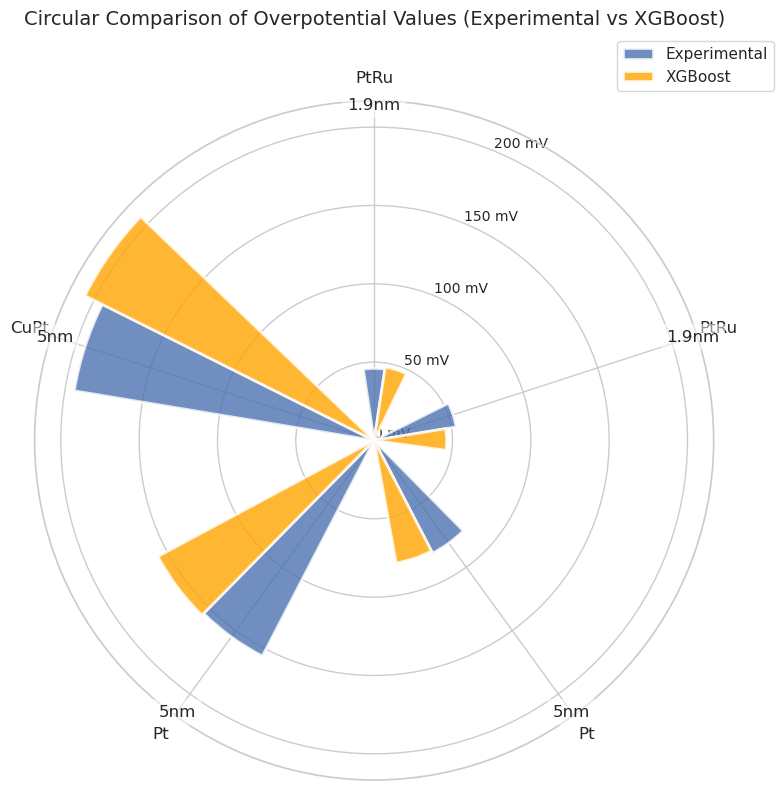

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Data
composition = ['PtRu', 'PtRu', 'Pt', 'Pt', 'CuPt']
experimental_values = [46, 53, 81, 155, 194]
xgboost_values = [47.3, 46.24, 79.46, 156.6, 206.4]
relative_errors = [2.9, 12.7, 1.9, 6.9, 3.8]  # Convert percentage to fraction
particle_size = [1.9, 1.9, 5, 5, 5]

# Number of bars
N = len(composition)

# Setting angles for polar plot (convert composition to an angle in radians)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Closing the circle

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Repeat values to close the circular plot
experimental_values += experimental_values[:1]
xgboost_values += xgboost_values[:1]

# Plotting the bars
bars = ax.bar(angles[:-1], experimental_values[:-1], width=0.3, alpha=0.8, color='b', label="Experimental", edgecolor='white', linewidth=2)
bars2 = ax.bar([a + 0.3 for a in angles[:-1]], xgboost_values[:-1], width=0.3, alpha=0.8, color='orange', label="XGBoost", edgecolor='white', linewidth=2)

# Annotating particle size
for angle, size in zip(angles[:-1], particle_size):
    ax.text(angle, max(experimental_values) + 20, f'{size}nm', size=12, horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Set the labels and adjust the layout
ax.set_theta_offset(np.pi / 2)  # Rotate the plot to start from the top
ax.set_theta_direction(-1)  # Clockwise

ax.set_xticks(angles[:-1])
ax.set_xticklabels(composition, fontsize=12)

# Add radial labels (representing Overpotential values)
ax.set_yticks(np.arange(0, max(experimental_values) + 50, 50))
ax.set_yticklabels([f'{val} mV' for val in np.arange(0, max(experimental_values) + 50, 50)], fontsize=10)

# Title and legend
plt.title('Circular Comparison of Overpotential Values (Experimental vs XGBoost)', size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_33984/210315840.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', N)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_33984/210315840.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


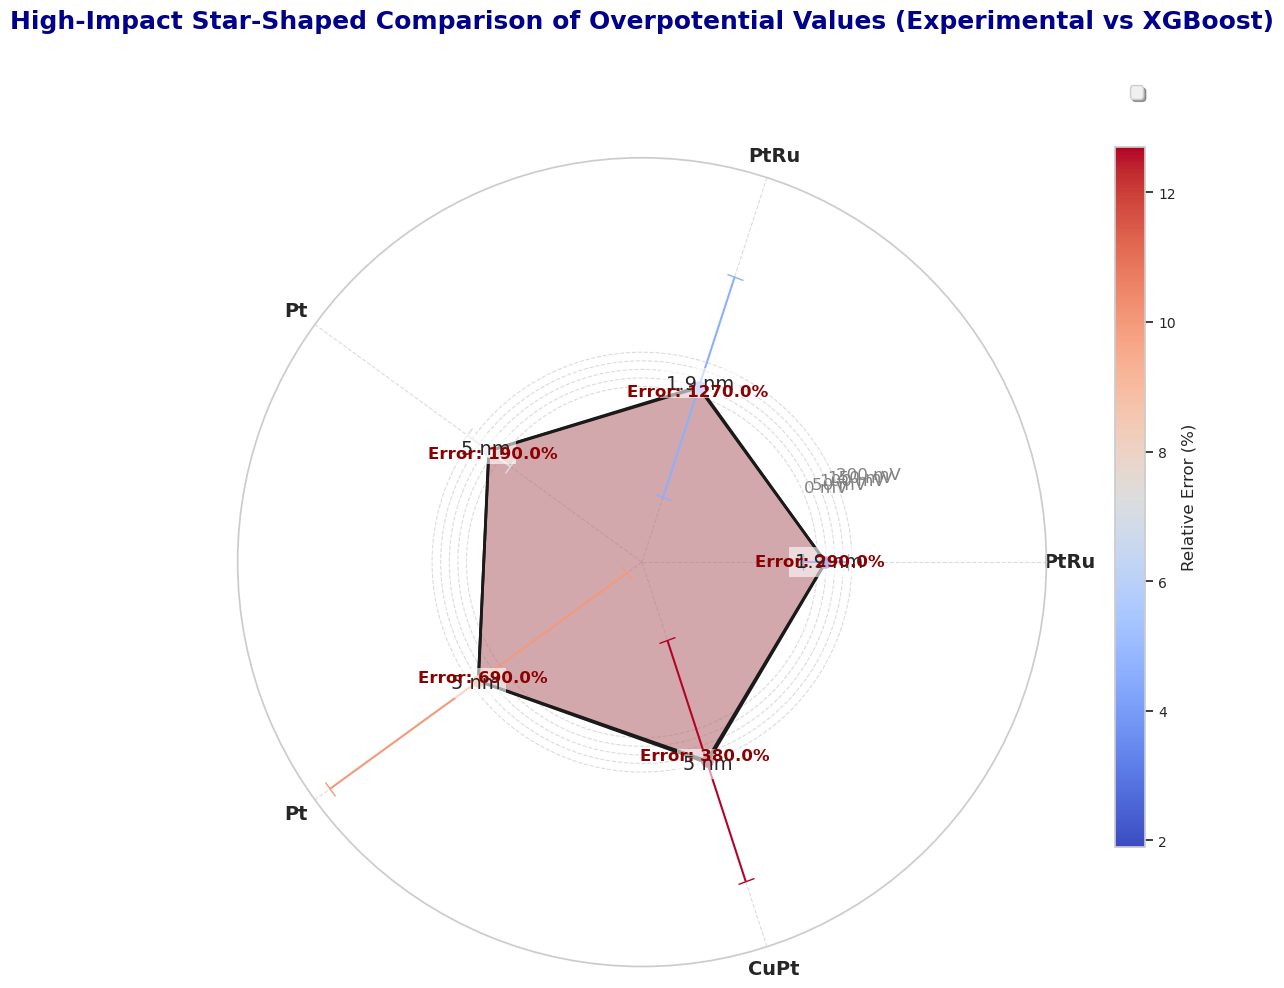

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.cm as cm

# Data
composition = ['PtRu', 'PtRu', 'Pt', 'Pt', 'CuPt']
experimental_values = [46, 53, 81, 155, 194]
xgboost_values = [47.3, 46.24, 79.46, 156.6, 206.4]
relative_errors = [2.9, 12.7, 1.9, 6.9, 3.8]  # Convert percentage to fraction
particle_size = [1.9, 1.9, 5, 5, 5]

# Number of variables
N = len(composition)

# Setting angles for radar plot (equally spaced angles in radians)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Closing the loop

# Repeat values to close the radar/star plot
experimental_values += experimental_values[:1]
xgboost_values += xgboost_values[:1]
relative_errors += relative_errors[:1]

# Create the radar plot (Star Shape)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Enhancing the Star-Shape Radar Plot with Polygon
def plot_polygon(ax, values, angles, color, label, alpha=0.3, edgecolor='k'):
    """Helper function to plot a filled polygon with custom styles."""
    ax.fill(angles, values, color=color, alpha=alpha, label=label)
    ax.plot(angles, values, color=edgecolor, linewidth=2)

# Custom colormap to give a gradient effect based on values
colors = cm.get_cmap('coolwarm', N)

# Plot Experimental data with error bars and gradient fill
for i in range(N):
    ax.errorbar(angles[i], experimental_values[i], yerr=relative_errors[i] * experimental_values[i],
                fmt='o', color=colors(i), capsize=6, markersize=8)

plot_polygon(ax, experimental_values, angles, color='cornflowerblue', label='Experimental', alpha=0.4)

# Plot XGBoost predictions with gradient
plot_polygon(ax, xgboost_values, angles, color='orangered', label='XGBoost', alpha=0.3)

# Annotating particle size at the tips of the star
for angle, size, exp_value in zip(angles[:-1], particle_size, experimental_values[:-1]):
    ax.text(angle, exp_value + 20, f'{size} nm', size=14, 
            horizontalalignment='center', verticalalignment='center', 
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

# Adding relative error annotations along the perimeter of the star
for angle, rel_error, exp_value in zip(angles[:-1], relative_errors[:-1], experimental_values[:-1]):
    ax.text(angle, exp_value - 30, f'Error: {rel_error*100:.1f}%', size=12, 
            color='darkred', weight='bold', horizontalalignment='center', verticalalignment='center')

# Set labels (composition) with bold font
ax.set_xticks(angles[:-1])
ax.set_xticklabels(composition, fontsize=14, fontweight='bold')

# Custom radial ticks and radial grid style
ax.set_yticks(np.arange(0, max(experimental_values) + 50, 50))
ax.set_yticklabels([f'{val} mV' for val in np.arange(0, max(experimental_values) + 50, 50)], fontsize=12, color='gray')
ax.grid(True, linestyle='--', linewidth=0.8, alpha=0.7)

# Title with advanced style
plt.title('High-Impact Star-Shaped Comparison of Overpotential Values (Experimental vs XGBoost)', 
          size=18, weight='bold', color='darkblue', y=1.15)

# Custom colorbar to visually represent relative error values
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])  # position of the colorbar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=min(relative_errors), vmax=max(relative_errors)))
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Relative Error (%)', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# Detailed legend with enhanced style
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), frameon=True, shadow=True, fontsize=12)
legend.get_frame().set_facecolor('#f0f0f0')

# Final touches for clean layout and display
plt.tight_layout()
plt.show()


/tmp/ipykernel_33984/2762016917.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')
/tmp/ipykernel_33984/2762016917.py:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(Polygon(error_band, closed=True, color=color, alpha=0.6, edgecolor='black', linewidth=2))  # Bold border for clarity
/tmp/ipykernel_33984/2762016917.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


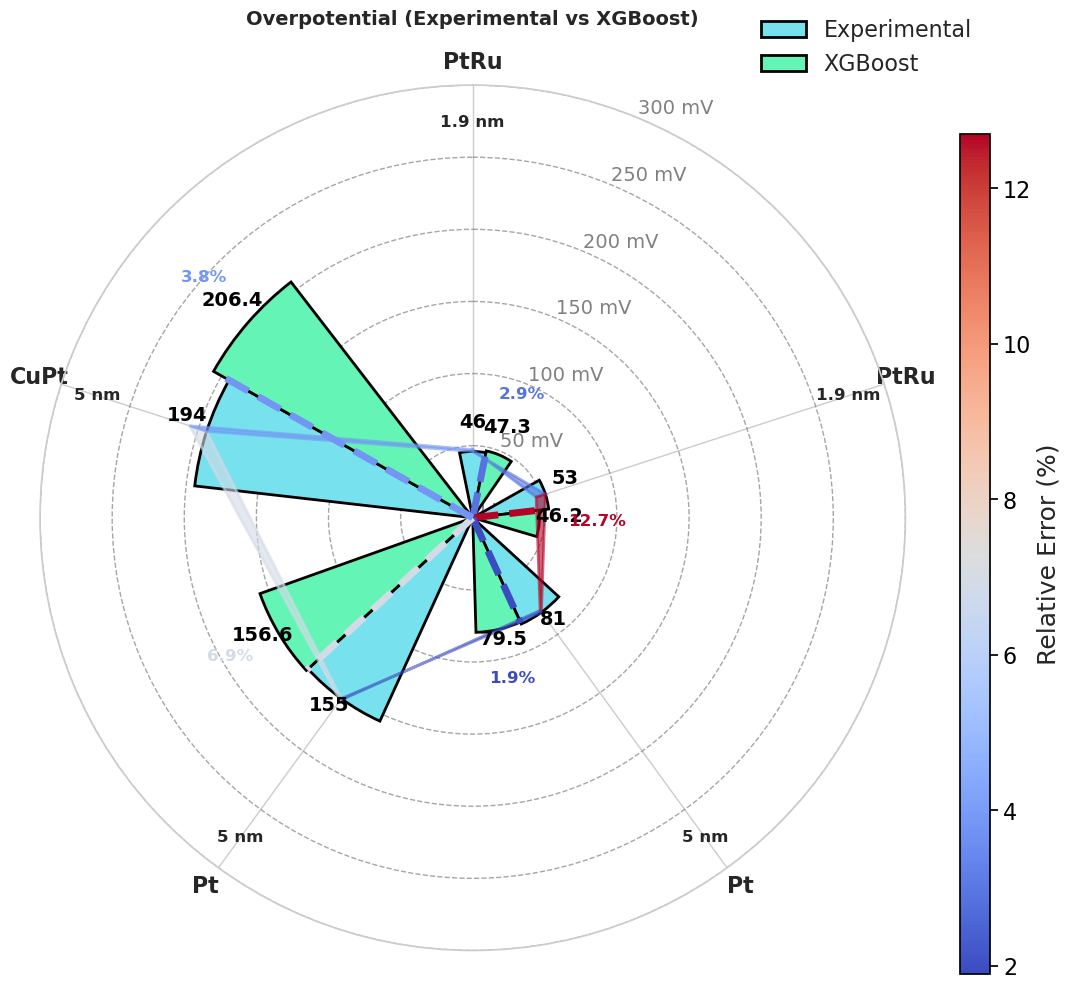

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon

# Data
composition = ['PtRu', 'PtRu', 'Pt', 'Pt', 'CuPt']
experimental_values = [46, 53, 81, 155, 194]
xgboost_values = [47.3, 46.24, 79.46, 156.6, 206.4]
relative_errors = [2.9, 12.7, 1.9, 6.9, 3.8]  # Percentage
particle_size = [1.9, 1.9, 5, 5, 5]

# Number of bars
N = len(composition)

# Setting angles for polar plot
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Closing the circle

# Create the plot
fig, ax = plt.subplots(figsize=(10, 12), subplot_kw=dict(polar=True))

# Repeat values to close the circular plot
experimental_values += experimental_values[:1]
xgboost_values += xgboost_values[:1]
relative_errors += relative_errors[:1]  # To close the loop for relative errors

# Colors for the bars
exp_color = '#77e1ed'
xgb_color = '#64f5b6'

# Color map and normalization for relative errors
cmap = cm.get_cmap('coolwarm')
norm = Normalize(vmin=min(relative_errors), vmax=max(relative_errors))

# Plotting the bars
width = 0.4
bars = ax.bar(angles[:-1], experimental_values[:-1], width=width, color=exp_color, edgecolor='black', linewidth=2, label="Experimental")
bars2 = ax.bar([a + width for a in angles[:-1]], xgboost_values[:-1], width=width, color=xgb_color, edgecolor='black', linewidth=2, label="XGBoost")

# Adding bold error bands
for i in range(N):
    angle = angles[i]
    next_angle = angles[(i + 1) % N]
    
    # Error band (polygon with bold color and high opacity)
    error_band = np.array([
        [angle, experimental_values[i]],
        [next_angle, experimental_values[i + 1]],
        [next_angle, xgboost_values[i + 1]],
        [angle, xgboost_values[i]]
    ])
    
    color = cmap(norm(relative_errors[i]))
    ax.add_patch(Polygon(error_band, closed=True, color=color, alpha=0.6, edgecolor='black', linewidth=2))  # Bold border for clarity

# Adding thicker error bars with pattern
for i in range(N):
    angle = angles[i] + width / 2
    next_angle = angles[(i + 1) % N] + width / 2
    x_position = (angle + next_angle) / 2
    y_position = (experimental_values[i] + xgboost_values[i]) / 2
    
    # Adding error bars with patterns
    ax.plot([angle, angle], [0, y_position], color=cmap(norm(relative_errors[i])), linestyle='--', linewidth=5, alpha=0.999)  # Thicker and more visible with pattern

# Adding bold value and error annotations on the bars
for bar, value, error in zip(bars, experimental_values[:-1], relative_errors):
    angle = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    ax.text(angle, height + 14, f'{value}', size=14, horizontalalignment='center', verticalalignment='bottom', color='black', fontweight='bold')
    #ax.text(angle, height + 35, f'±{error:.1f}%', size=16, horizontalalignment='center', verticalalignment='bottom', color=highlight_color, fontweight='bold', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'))

for bar, value, error in zip(bars2, xgboost_values[:-1], relative_errors):
    angle = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    ax.text(angle, height + 14, f'{value:.1f}', size=14, horizontalalignment='center', verticalalignment='bottom', color='black', fontweight='bold') #, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5')
    ax.text(angle, height + 40, f'{error:.1f}%', size=12, horizontalalignment='center', verticalalignment='bottom', color=cmap(norm(error)), fontweight='bold')

# Annotating particle size
for angle, size in zip(angles[:-1], particle_size):
    ax.text(angle, max(experimental_values) + 80, f'{size} nm', size=12, horizontalalignment='center', verticalalignment='center', fontweight='bold')

# Set the labels and adjust the layout
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(composition, fontsize=16, fontweight='bold')

# Add radial labels
ax.set_yticks(np.arange(0, max(experimental_values) + 150, 50))
ax.set_yticklabels([f'{val} mV' for val in np.arange(0, max(experimental_values) + 150, 50)], fontsize=14, color='grey')

# Add gridlines
ax.yaxis.grid(True, linestyle='--', color='grey', alpha=0.7)

# Title and legend
plt.title('Overpotential (Experimental vs XGBoost)', size=14, y=1.06, fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=16, frameon=False)

# Custom colorbar to visually represent relative error values
cbar_ax = fig.add_axes([0.97, 0.12, 0.03, 0.7])
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Relative Error (%)', fontsize=18)

# Customizing colorbar appearance
cbar.ax.set_facecolor('lightgrey')  # Background color of the colorbar
cbar.ax.tick_params(labelsize=16, colors='black')  # Color of ticks and labels
cbar.outline.set_edgecolor('black')  # Color of the colorbar border

#plt.savefig('exp_radar_chart.jpg', format='jpg', bbox_inches='tight', dpi=900)
plt.tight_layout()
plt.show()
